In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
# create data
fruit = {'cost': [1.2, 1.0, 4, 2.5], 'fruit':['apples', 'oranges', 'grapes', 'mangoes']}

df = pd.DataFrame.from_dict(fruit)

df

,cost,fruit
0,1.2,apples
1,1.0,oranges
2,4.0,grapes
3,2.5,mangoes


In [3]:
# separate categorical column 
X_cat = df.drop('cost', axis=1)
df = df.drop('fruit', axis=1)
X_cat_arr = np.array(X_cat['fruit'])
X_cat_arr

array(['apples', 'oranges', 'grapes', 'mangoes'], dtype=object)

In [4]:
ohe = OneHotEncoder(sparse=False)
df_oh = pd.DataFrame(ohe.fit_transform(X_cat), index= df.index, columns=ohe.get_feature_names(X_cat.columns))
df_no_drop = df.join(df_oh)
df_no_drop.head()

,cost,fruit_apples,fruit_grapes,fruit_mangoes,fruit_oranges
0,1.2,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,4.0,0.0,1.0,0.0,0.0
3,2.5,0.0,0.0,1.0,0.0


In [5]:
ohe = OneHotEncoder(sparse=False)
df_oh = pd.DataFrame(ohe.fit_transform(X_cat), index= df.index, columns=ohe.get_feature_names(X_cat.columns))
df_no_drop = df.join(df_oh)
df_no_drop.head()

,cost,fruit_apples,fruit_grapes,fruit_mangoes,fruit_oranges
0,1.2,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,4.0,0.0,1.0,0.0,0.0
3,2.5,0.0,0.0,1.0,0.0


In [6]:
mean_cost = df_no_drop.cost.mean()
mean_cost

2.175

In [7]:
df_no_drop['deviation'] = [np.abs(i-mean_cost) for i in df_no_drop.cost]
df_no_drop.head()

,cost,fruit_apples,fruit_grapes,fruit_mangoes,fruit_oranges,deviation
0,1.2,1.0,0.0,0.0,0.0,0.975
1,1.0,0.0,0.0,0.0,1.0,1.175
2,4.0,0.0,1.0,0.0,0.0,1.825
3,2.5,0.0,0.0,1.0,0.0,0.325


In [9]:
ohe = OneHotEncoder(sparse=False)
df_oh = pd.DataFrame(ohe.fit_transform(X_cat), index= df.index, columns=ohe.get_feature_names(X_cat.columns))
df_drop = df.join(df_oh)
df_drop.pop('fruit_oranges')
df_drop.head()

,cost,fruit_apples,fruit_grapes,fruit_mangoes
0,1.2,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,4.0,0.0,1.0,0.0
3,2.5,0.0,0.0,1.0


In [10]:
df_drop['orange_deviation'] = [np.abs(i-1) for i in df_no_drop.cost]
df_drop.head()

,cost,fruit_apples,fruit_grapes,fruit_mangoes,orange_deviation
0,1.2,1.0,0.0,0.0,0.2
1,1.0,0.0,0.0,0.0,0.0
2,4.0,0.0,1.0,0.0,3.0
3,2.5,0.0,0.0,1.0,1.5


In [11]:
import matplotlib.pyplot as plt

In [17]:
# create data
fruit = {'apples':1.2, 'oranges':1.0, 'grapes':4, 'mangoes':2.5, 'average':mean_cost}

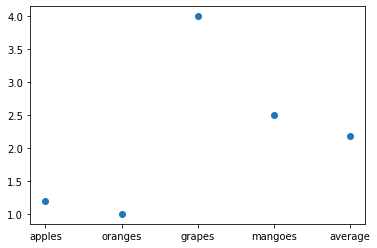

In [18]:
figsize = None
fig, ax = plt.subplots(figsize=figsize)

ax.scatter(fruit.keys(), fruit.values())


In [ ]:
# # This code will onehotencode the categorical columns and return the dataframe
# # inputs: X (dataframe), column_list (list of categorical columns)
# # returns: X_ohe (one-hot-encoded dataframe)
# # note, operations NOT done inplace

# def ohe2021(X, column_list):  
#     # One hot encode
#     valid_columns = []
    
#     # remove columns not in X dataframe
#     for column in column_list:
#         if column in X.columns:
#             valid_columns.append(column)
        
#         else:
#             print(f'Column "{column}" not found in DataFrame')
            
#     # get dataframe of categroical columns to oneHotEncode
#     X_cat = X[valid_columns]
#     X_cat.head()

#     # get dataframe of numeric columns to oneHotEncode
#     X_num = X.drop(valid_columns, axis=1)
#     X_num.head()

#     # Finally, One Hot Encode
#     # from sklearn.preprocessing import OneHotEncoder
#     ohe = OneHotEncoder(sparse=False, drop='first')
#     X_cat_oh = pd.DataFrame(ohe.fit_transform(X_cat), index= X_cat.index, columns=ohe.get_feature_names(X_cat.columns))
#     X_cat_oh.head()

#     # sandwich OHE df with numerical dataframes
#     X_ohe = X_num.join(X_cat_oh)
#     return X_ohe

# ohe_column_list = ['state', 'area code']
# X_train_ohe = ohe2021(X_train, ohe_column_list)
# X_train_ohe.head()